<a href="https://colab.research.google.com/github/AmanPriyanshu/Understanding-Quantum-With-Qiskit/blob/master/Qiskit_circuit_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circuit 2:

Following: https://www.youtube.com/watch?v=mMwovHK2NrE&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=5 Official Qiskit Tutorial

Installing Qiskit

In [0]:
pip install qiskit -q

In [0]:
pip install qiskit-terra[visualization] -q

### Restart the Notebook if on Google Colab
After execution of:


```
# pip install qiskit-terra[visualization] -q
```


Importing Everything From Qiskit

In [0]:
from qiskit import *

Generating a (3,3) Quantum Circuit with 3 Quantum Registers and 3 Classical Registers

In [0]:
circuit = QuantumCircuit(3, 3)

Drawing Empty Circuit

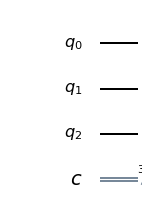

In [5]:
%matplotlib inline
circuit.draw(output='mpl')

Generating Quatum state |1> in Q(0)

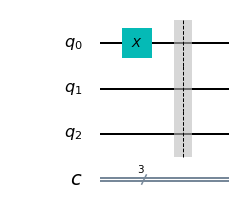

In [6]:
circuit.x(0)
#circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')

## Creating An Entanglement
between Q(0) and Q(2)

Step 1: The below script allows us to map Q(1) to a Superposition between |0> and |1>

Step 2: Following this cx Gate, which will NOT Q(2) based on Q(1)'s state, which could either be |0> or |1>

In [7]:
circuit.h(1)
circuit.cx(1,2)

Drawing the generated Circuit

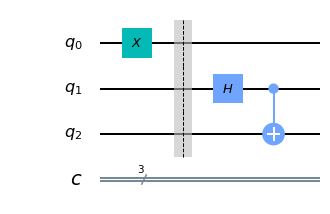

In [8]:
circuit.draw(output='mpl')

Step 1: Here the State of Q(0) affects Q(1) in the same way as above where if state of Q(0) := |1> then the NOT operation will be performed on Q(1), whereas no operation will be performed in the case of  Q(0) := |0>.

Step 2: Here the state of Q(0) is brought into superposition. Where it has an equal chance to be |0> or |1>

In [9]:
circuit.barrier()
circuit.cx(0,1)
circuit.h(0)

Drawing the Circuit

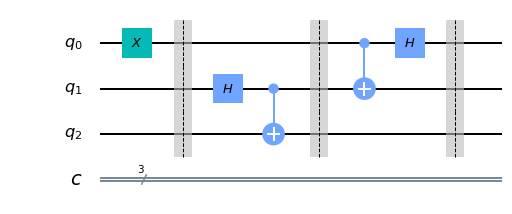

In [10]:
circuit.barrier()
circuit.draw(output='mpl')

Step 1: Now here, we will again apply CX Gate on Q(1) and Q(2). This will inturn transform Q(2) in the same method as stated above.

Step 2: It flips the sign of the target qubit if and only if the control qubit is 1. Here, the target is Q(2) and control is Q(0).

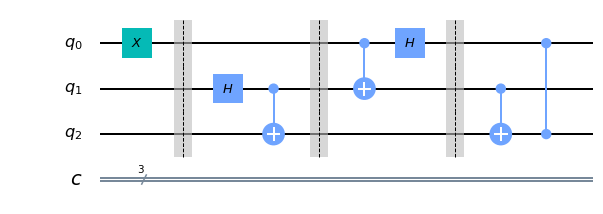

In [11]:
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

Matrix representation of the whole circuit

[[ 0. +0.0000000e+00j  0.5+0.0000000e+00j  0. +0.0000000e+00j
   0.5-6.1232340e-17j  0.5-6.1232340e-17j  0. +0.0000000e+00j
  -0.5+1.2246468e-16j  0. +0.0000000e+00j]
 [ 0. +0.0000000e+00j  0.5+0.0000000e+00j  0. +0.0000000e+00j
   0.5-6.1232340e-17j -0.5+6.1232340e-17j  0. +0.0000000e+00j
   0.5-1.2246468e-16j  0. +0.0000000e+00j]
 [ 0. +0.0000000e+00j  0.5+0.0000000e+00j  0. +0.0000000e+00j
  -0.5+6.1232340e-17j  0.5-6.1232340e-17j  0. +0.0000000e+00j
   0.5-1.2246468e-16j  0. +0.0000000e+00j]
 [ 0. +0.0000000e+00j  0.5+0.0000000e+00j  0. +0.0000000e+00j
  -0.5+6.1232340e-17j -0.5+6.1232340e-17j  0. +0.0000000e+00j
  -0.5+1.2246468e-16j  0. +0.0000000e+00j]
 [ 0.5-6.1232340e-17j  0. +0.0000000e+00j -0.5+1.2246468e-16j
   0. +0.0000000e+00j  0. +0.0000000e+00j  0.5+0.0000000e+00j
   0. +0.0000000e+00j  0.5-6.1232340e-17j]
 [ 0.5-6.1232340e-17j  0. +0.0000000e+00j -0.5+1.2246468e-16j
   0. +0.0000000e+00j  0. +0.0000000e+00j -0.5+0.0000000e+00j
   0. +0.0000000e+00j -0.5+6.1232340e-17j

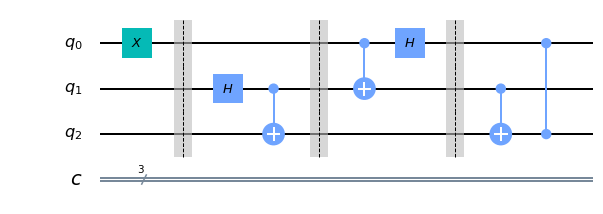

In [12]:
simulator = Aer.get_backend('unitary_simulator')
job = execute(circuit, simulator, shots=4096)
result = job.result()
unitary = result.get_unitary()
print(unitary)

%matplotlib inline
circuit.draw(output='mpl')

### MEASURING CIRCUIT

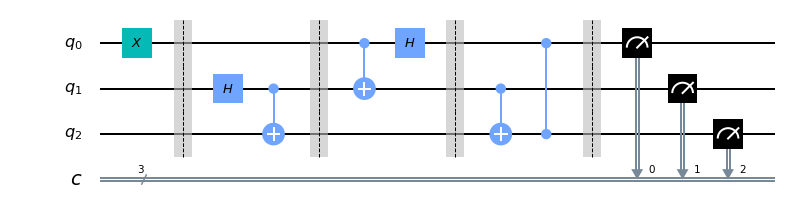

In [13]:
circuit.barrier()
circuit.measure([0,1,2],[0,1,2])
circuit.draw(output='mpl')

In [0]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=4096)
result = job.result()
counts = result.get_counts()

### HISTOGRAM VISUALIZATION

Also we must realise that the output is read from Right Hand Side. i.e. the output 110 is Q(2) = 1, Q(1) = 1 and Q(0) = 0

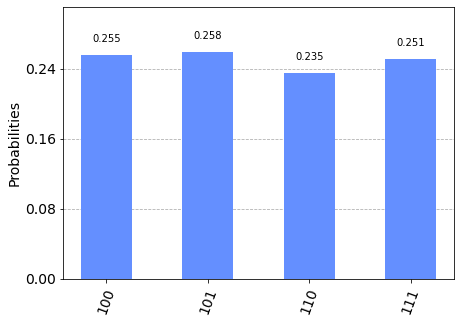

In [15]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

We can see that we have got only results where Q(2) = 1. Thereby, allowing us to realise that Quantum state has been effectively copied or teleported from Q(0) to Q(2).

Why does this happen?

Well we first have to define each of the Quantum States before building our teleportation circuit:

Q(0) := |1>     `Random may or may not be |1>`<br /> 
Q(1) := |0>     `won't matter because of single use of H-Gate`<br /> 
Q(2) := |0>     `I think this is very important. However, I am learning so... please correct me if I am worng`

So, let us begin by defining what is happening in between the first and second barrier. We create H-gate basically followed by CX-Gate transferring the Quantum state of Q(1) to Q(2). How? Basically if Q(1) measures |0> then Q(2) remains |0> on the other hand if Q(1) measures |1> then Q(2) flips to |1>

Now, that we have matched Q(2) with Q(1). We will begin by analysing segment between the second and third barrier. We will flip Q(1) depending on the value of Q(0). Let us take the example that Q(0) := |1>. Here, Q(1) get's flipped. Therefore, Q(1)'s state is inverse of Q(2)'s. 
In the segment between third and fourth barrier, implementing CX-Gate, will lead to Q(2) always being in the Quantum state |1>. Cause CX-Gate is very similar to Ex-Or and dissimilar inputs in Ex-Or lead to an always True

On the other hand if Q(0) := |0>. Here, Q(1) remains the same. Now, Q(1)'s state and Q(2)'s state remains the same. Following it up between the third and fourth barrier, implementing CX-Gate, will lead to Q(2) always being |0>. Cause CX-Gate is very similar to Ex-Or and similar inputs in Ex-Or lead to an always False.

As we can see in both cases the Quantum State is copied very easily onto a third state.

(I genuinely wanna know why we haven't just copied the state using a simple CX-Gate since this algorithm won't work if Q(2) := 0. I would love an explaination, maybe by a pull request or idk how to interact using GitHub. For example we can go: circuit.cx(0,2))

## CZ Gate

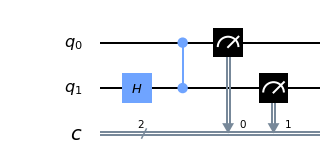

In [16]:
circuit = QuantumCircuit(2, 2)
#circuit.x(0)
circuit.h(1)
circuit.cz(0,1)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

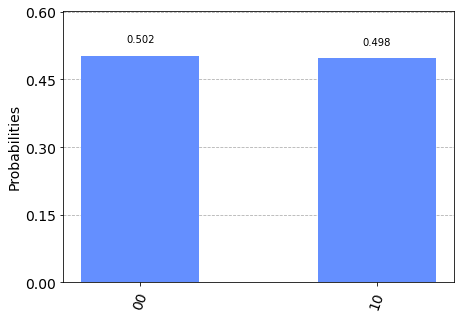

In [17]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=4096)
result = job.result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

(0, 0) ----CZ----> (0, 0)

(1, 0) ----CZ----> (1, 0)

(0, 1) ----CZ----> (0, 1)

(1, 1) ----CZ----> (1, 1)


### TWO H-GATES SEQUENTIALLY

Same Gates applied Sequentially lead to the input

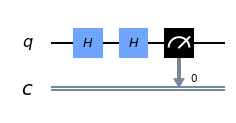

In [18]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw(output='mpl')

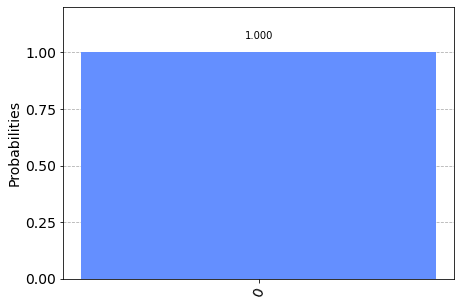

In [19]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=4096)
result = job.result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

### H-Gate followed by CX-Gate

If the target is 0 then the state of control is just copied onto the target bt

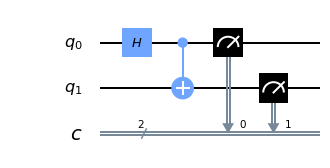

In [20]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

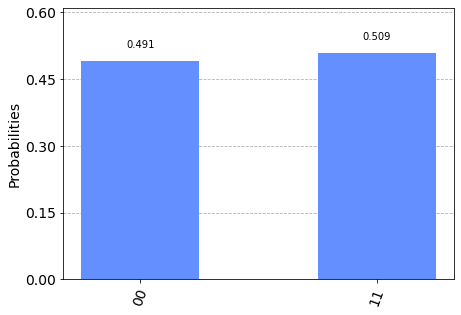

In [21]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=4096)
result = job.result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

### Copied State then inverse is CX'ed

Discovering it's an XOR-Gate was a real moment. Proof:
Well below inversing results in only a flipped state  as output whereas Sequential Quantum Gates would lead to the Original Input stae. Starting with target as |0>, we get |1> if control is |1> and |0> if control is |0>, similarly, target as |1>, we get |0> if control is |1> and |1> if control is |0>. So a simple Ex-Or gate. One of the few logical gates which are naturally reversible. Like X-Gate which is a NOT-Gate

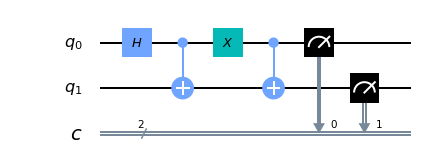

In [22]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
# copied
circuit.x(0)
# Flipped control
circuit.cx(0, 1)
# CX the inverse
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

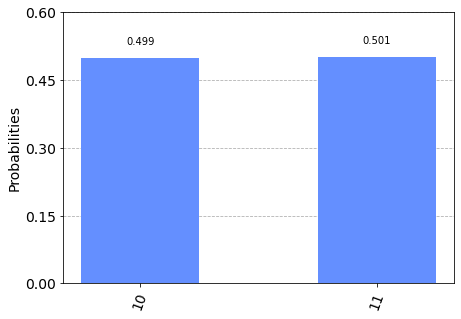

In [23]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=4096)
result = job.result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

### DOUBT
Why don't we just circuit.cx(0,2). I mean it is understandable how the above code works and their is probably some important implementation step I am missing. However, I would love to understand and document that, since I was not able to get an appropriate answer on the YouTube video: https://www.youtube.com/watch?v=mMwovHK2NrE&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=5

here is the implementation of my doubt.

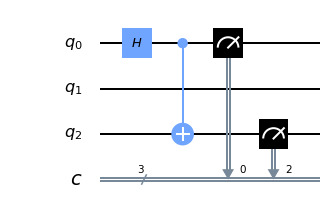

In [24]:
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx(0, 2)
# state is copied since initial state of Q(2) is |0>
circuit.measure([0,2], [0,2])
circuit.draw(output='mpl')

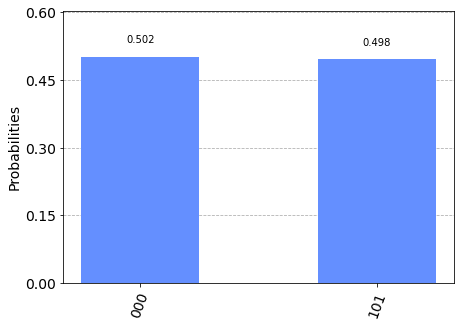

In [25]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=4096)
result = job.result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Here, we can clearly see that both the states are preserving their values. Whereas above Q(0) loses its state. It dosen't make sense for that to happen if we want to measure a Qubit in the middle of a certain process. Since we continue to need it later on. However, if there exists a way which allows Q(2) to have an initial state defined by an H-Gate. Then we can re-use one Qubit throughout the process for just Measurement.

Now the only idea for this is maybe after every implementation we are able to return the Quantum state of Q(2) to |0>. Which is not a reversible method. So, more than two Qubit have to be involved and we have to make sure that all of them are initiated by an H-Gate. This is a Doubt though so don't.